In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Specify the folder path where your images are stored
folder_path = 'knnimages'

# Initialize an empty list to store the images
image_list = []
filenames=[]
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you can add more extensions if needed)
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        # Construct the full file path
        filenames.append(filename)
        file_path = os.path.join(folder_path, filename)
        
        # Read the image using matplotlib
        image =  mpimg.imread(file_path)
        # Resizing the image
        image = cv2.resize(image,(200,200))
        # Append the image to the list
        image_list.append(image)
        
# Convert the list of images to a NumPy array
image_array = np.array(image_list)

# Now you have all 20 images stored in a NumPy array
print(f"Number of images: {len(image_array)}")
print(f"Image shape: {image_array.shape}")
label=[]
for filename in filenames:
    name_parts = filename.split()
    if name_parts:
        label.append(name_parts[0])




Number of images: 20
Image shape: (20, 200, 200, 3)


In [2]:
distarray=np.zeros(20)
# Reading and resizing the test image
testimg1 = mpimg.imread('test images\dog (2).jpg')
testimg1 = cv2.resize(testimg1,(200,200))
#Converting values from unsigned int to int
testimg=testimg1.flatten().astype(int)
for i in range(20):
  checkimage=image_array[i].flatten().astype(int)
                             
  distance=0.0
  #Calculating Euclidean Distance
  distance=(testimg-checkimage)**2
    
  distance=np.sum(distance,dtype=np.int64)
             
  distance=np.sqrt(distance)

  #Storing distance value in array
  distarray[i]=distance                                  
distarray=np.array(distarray)
print(distarray) 

[33017.69731523 33480.84588238 33436.20397114 27983.73770603
 31544.17382022 35223.60444361 30582.86015074 30012.40373579
 36685.13589998 38634.71178875 28916.66173679 34434.33463856
 27869.22203794 34104.68007473 29550.84244146 28737.44705084
 31453.31575526 38796.08863017 37141.70535934 32723.12000711]


In [3]:
# Sorting dist array on 
distarraysort=np.argsort(distarray)

It seems to be a dog


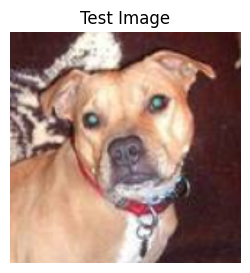

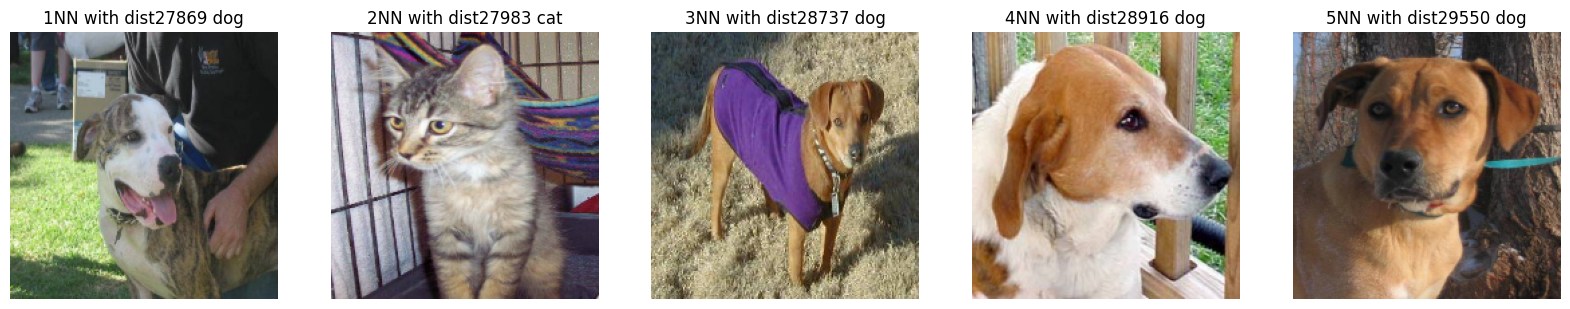

In [4]:
# Visualizing Test image with its 5 closest nearest neighbor
finallabel=[]
fig1=plt.figure(figsize=(3, 3))
plt.imshow(testimg1)
plt.axis('off')
title=("Test Image")
plt.title(title)
fig2=plt.figure(figsize=(20, 20))
for x in range(5):
    n=distarraysort[x]
    fig2.add_subplot(1, 5, x+1)
    plt.imshow(image_array[n])
    plt.axis('off')
    dist=int(distarray[n])
    finallabel.append(label[n])
    title=(str(x+1)+"NN with dist"+str(dist)+' '+str(label[n]))
    plt.title(title)
    cat_count=0
    dog_count=0
for animal in finallabel:
    if "cat" in animal:
        cat_count += 1
    elif "dog" in animal:
        dog_count += 1 
if cat_count > dog_count:
    print("It seems to be a cat")
else:
    print("It seems to be a dog")       